# BI - аналитика

## u.user

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('u.user.csv', sep='|', header=None)
data.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
data.columns = ['user_id', 'age','gender','occupation','zip_code']
data.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [38]:
print('Количество выбросов в data: '+str(data.isnull().sum().sum()))

Количество выбросов в data: 0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


## Построить гистограмму пользователей по возрасту

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 13,7

In [106]:
data_age = data.groupby('age').count().reset_index()
data_age = data_age[['age','user_id']]
data_age.columns = ['age','user_count']
data_age.head()

,age,user_count
0,7,1
1,10,1
2,11,1
3,13,5
4,14,3


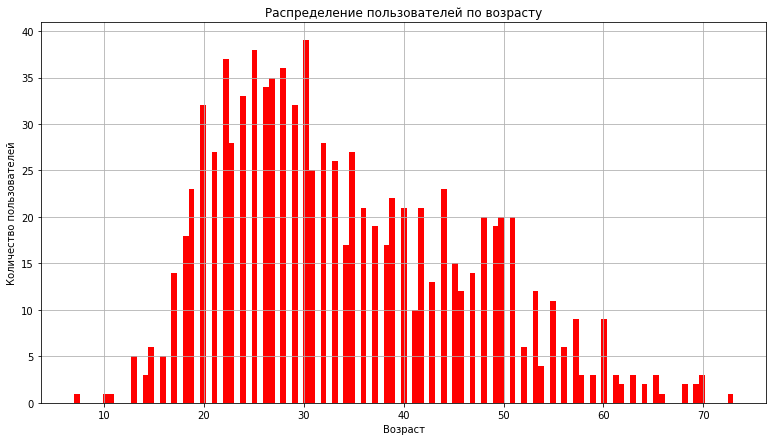

In [132]:
n, bins, patches = plt.hist(data['age'], 115, facecolor='r')

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту')
plt.grid(True)
plt.show()

## Построить 2 графика, показывающих распределение людей по профессиям в зависимости от их пола

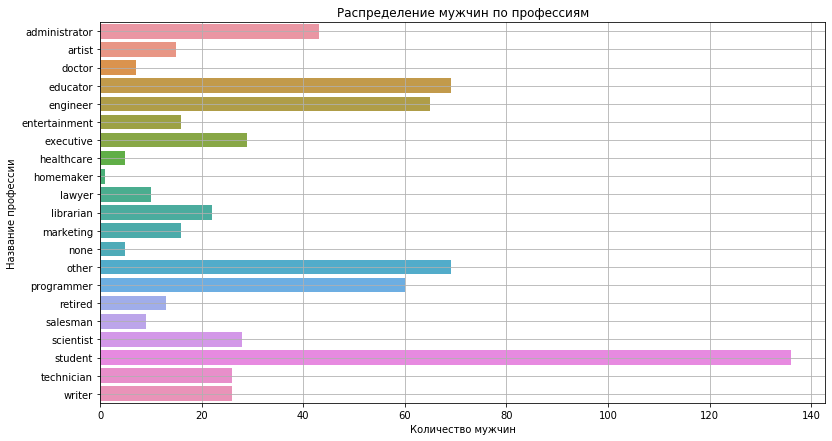

In [134]:
mans = data[data['gender'] == 'M']
mans = mans.groupby('occupation').count().reset_index()
mans = mans[['occupation','user_id']]
mans.columns = ['occupation','user_count']

f, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x=mans['user_count'], y=mans['occupation'])

plt.xlabel('Количество мужчин')
plt.ylabel('Название профессии')
plt.title("Распределение мужчин по профессиям")
plt.grid()
plt.show()

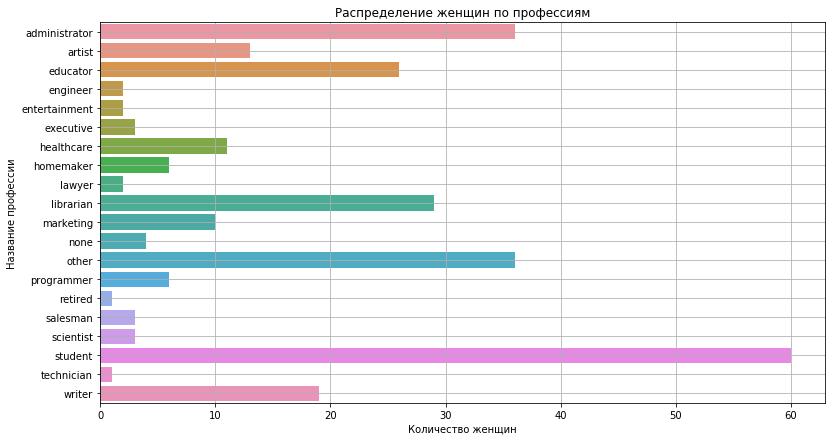

In [133]:
womans = data[data['gender'] == 'F']
womans = womans.groupby('occupation').count().reset_index()
womans = womans[['occupation','user_id']]
womans.columns = ['occupation','user_count']

f, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x=womans['user_count'], y=womans['occupation'])

plt.xlabel('Количество женщин')
plt.ylabel('Название профессии')
plt.title("Распределение женщин по профессиям")
plt.grid()
plt.show()

## u.item

In [11]:
data = pd.read_csv('u.item.csv', sep='|', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
data.columns = ['movie id', 'movie_title', 'release_date', 'video_release_date', \
'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', \
'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', \
'Thriller', 'War', 'Western']
data.head()

,movie id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
print('Количество выбросов в data: '+str(data.isnull().sum().sum()))

Количество выбросов в data: 1686


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1682 non-null int64
movie_title           1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
IMDb_URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Childrens             1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

## Построить график количества фильмов по жанрам

In [11]:
data_genres = data[['Action', 'Adventure', 'Animation', \
'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', \
'Thriller', 'War', 'Western']]
data_genres.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [22]:
genres = []
for genre in data_genres.columns:
    genres.append(data_genres[genre].sum())

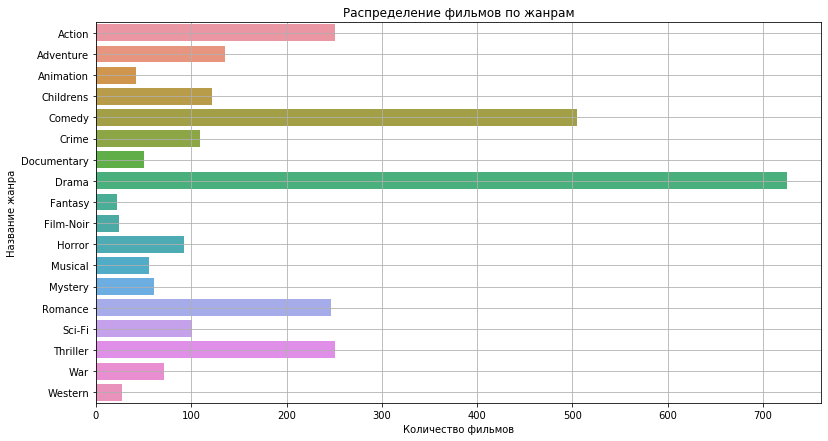

In [21]:
f, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x=genres, y=data_genres.columns)

plt.xlabel('Количество фильмов')
plt.ylabel('Название жанра')
plt.title("Распределение фильмов по жанрам")
plt.grid()
plt.show()

## Построить график количества фильмов по годам

In [3]:
from datetime import datetime

In [97]:
datas = data['release_date']
datas = datas.dropna()

In [123]:
data_data = []
for x in datas:
    date = datetime.strptime( x, '%d-%b-%Y' )
    result = date.strftime('%Y')
    data_data.append(int(result))

In [124]:
df = pd.DataFrame({'col0':data_data, 'col1':data_data})
df = df.groupby('col0').count().reset_index()
df.columns = ['date','count']

In [126]:
df

,date,count
0,1922,1
1,1926,1
2,1930,1
3,1931,1
4,1932,1
...,...,...
66,1994,214
67,1995,219
68,1996,355
69,1997,286


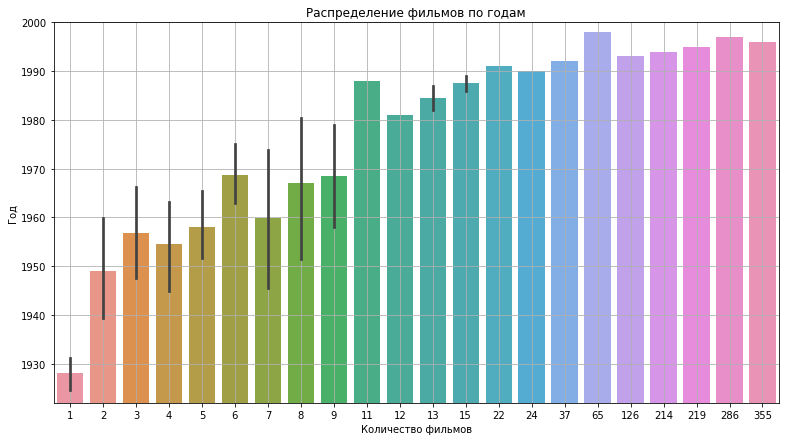

In [127]:
f, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x=df['count'], y=df['date'])

plt.xlabel('Количество фильмов')
plt.ylabel('Год')
plt.title("Распределение фильмов по годам")
plt.grid()
plt.ylim(1922,2000)
plt.show()

## u.data

In [14]:
data = pd.read_csv('u.data.csv', sep='\t', header=None)
data.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
data.columns = ['user_id', 'item_id', 'rating', 'timestamp']
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [90]:
print('Количество выбросов в data: '+str(data.isnull().sum().sum()))

Количество выбросов в data: 0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


## Построить график количества оценок по месяцам и годам

In [22]:
def column_of_date(row):
    """Даты оценок фильмов"""
    return datetime.fromtimestamp(row['timestamp'])
data['date'] = data.apply(column_of_date, axis=1)

def column_of_year_and_month(row):
    """Год и месяц фильмов"""
    return row['date'].year, row['date'].month
data['ym'] = data.apply(column_of_year_and_month, axis=1)

data.head()

,user_id,item_id,rating,timestamp,date,ym
0,196,242,3,881250949,1997-12-04 18:55:49,"(1997, 12)"
1,186,302,3,891717742,1998-04-04 22:22:22,"(1998, 4)"
2,22,377,1,878887116,1997-11-07 10:18:36,"(1997, 11)"
3,244,51,2,880606923,1997-11-27 08:02:03,"(1997, 11)"
4,166,346,1,886397596,1998-02-02 08:33:16,"(1998, 2)"


In [24]:
datas = data[['rating','ym']]
result = datas.groupby('ym').count().reset_index()
result.columns = ['date','count']
result

,date,count
0,"(1997, 9)",6406
1,"(1997, 10)",10585
2,"(1997, 11)",23807
3,"(1997, 12)",12026
4,"(1998, 1)",14006
5,"(1998, 2)",11048
6,"(1998, 3)",12034
7,"(1998, 4)",10088


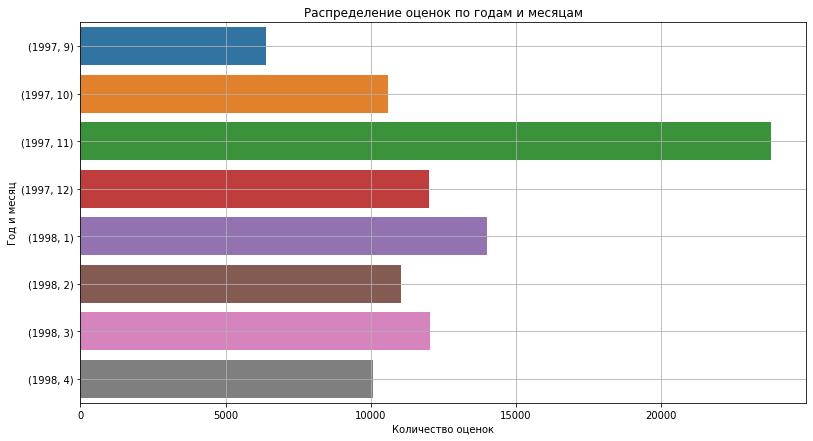

In [27]:
f, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x=result['count'], y=result['date'])

plt.xlabel('Количество оценок')
plt.ylabel('Год и месяц')
plt.title("Распределение оценок по годам и месяцам")
plt.grid()
plt.show()

## Выявить top-5 самых активных пользователей (больше всего оценок) за последние 3 месяца

In [33]:
datas = data[['rating','ym']]
result = datas.groupby('ym').count().reset_index()
result.columns = ['date','count']
tail = result.tail(3)
date_3 = tail[['date']]
date_3

,date
5,"(1998, 2)"
6,"(1998, 3)"
7,"(1998, 4)"


In [55]:
need = data[(data['ym'] == date_3['date'][5]) | (data['ym'] == date_3['date'][6]) | (data['ym'] == date_3['date'][7])]
need_datas = need.groupby('user_id').count().reset_index()
end = need_datas.sort_values(by='rating', ascending=False).head()
the_end = end[['user_id','rating']]
the_end.columns = ['user_id','count_rating']
the_end

,user_id,count_rating
300,655,685
108,234,480
180,393,448
4,7,403
314,682,399
